# SVCE ACM - DATA ALCHEMIST CONTEST

## Develop a model to predict smoker status using biosignal data. Use provided datasets. Evaluate models with accuracy and other metrics.

### Name : Abineshwar G
### Dept : CSE Section: A

# Smoking Prediction Model

Algorthim:
1. Load and preprocess the data.
2. Train a Random Forest model.
3. Evaluate the model using an ROC curve.
4. Generate predictions for the test set.
5. Prepare the submission file.

In [18]:
# Importing the necessary Libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Loading the given datasets

train_ds = pd.read_csv("/Users/abineshwar/Downloads/archive (1)/train_dataset.csv")
test_ds = pd.read_csv("/Users/abineshwar/Downloads/archive (1)/test_dataset.csv")

In [20]:
#Handling the training dataset first
#To display the first few rows of the data set.

print(train_ds.head())
print(train_ds.info())
print(train_ds.describe())

   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8            

In [21]:
# Checking for missing values
print(train_ds.isnull().sum())

# In case of missing values fill with the mean
train_ds.fillna(train_ds.mean(), inplace=True)

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


In [22]:
#target variable selection
X = train_ds.drop('smoking', axis=1)
y = train_ds['smoking']

#Data Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [23]:
#Training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Prediction
y_valid_prob = model.predict_proba(X_valid)[:, 1]

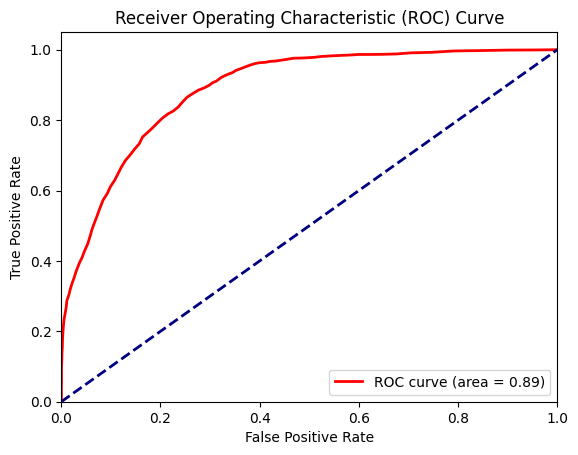

In [25]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)
roc_auc = roc_auc_score(y_valid, y_valid_prob)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
# Handling Test Dataset
if 'id' not in test_ds.columns:
    test_ds['id'] = range(15000, 15000 + len(test_ds))
test_ids = test_ds['id']
X_test = test_ds.drop('id', axis=1)
X_test = scaler.transform(X_test)

In [33]:
# Predict the probabilities for the test set
y_test_prob = model.predict_proba(X_test)[:, 1]

# Create the submission DataFrame
submission_ds = pd.DataFrame({'id': test_ids, 'smoking': y_test_prob})

# Save the DataFrame to a CSV file
submission_ds.to_csv('/Users/abineshwar/Downloads/submission.csv', index=False)

# Display the first few rows of the submission file
print(submission_ds.head())

      id  smoking
0  15000     0.80
1  15001     0.75
2  15002     0.13
3  15003     0.41
4  15004     0.23


## Result:


Hence, A model to predict smoker status using biosignal data has been developed successfully. 